In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
'''SYNTHETIC DATA GENERATION 1
INCLUDING: {
seasonal_component: amplitude, frequency
trend_component: slope, quadratic_curvature
noise: standard normal distributed with mean=0, sd=1
}
'''

def generate_seasonal_component(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

def generate_trend_component(t, slope, curvature):
    return slope * t + curvature * t**2

def generate_noise(noise_level):
    return noise_level * np.random.randn(len(t))

def generate_synthetic_time_series(t, amplitude, frequency, slope, curvature):
    seasonal_component = generate_seasonal_component(t, amplitude, frequency)
    trend_component = generate_trend_component(t, slope, curvature)
    
    synthetic_data = seasonal_component + trend_component
    return synthetic_data





# Example usage
t = np.linspace(0, 30, 90)
amplitude = 2.0
frequency = 0.1
slope = 0.1
curvature = 0.01
noise_level = 0.5

synthetic_data = generate_synthetic_time_series(t, amplitude, frequency, slope, curvature)
default_noise = generate_noise(noise_level)
synthetic_data = synthetic_data + default_noise



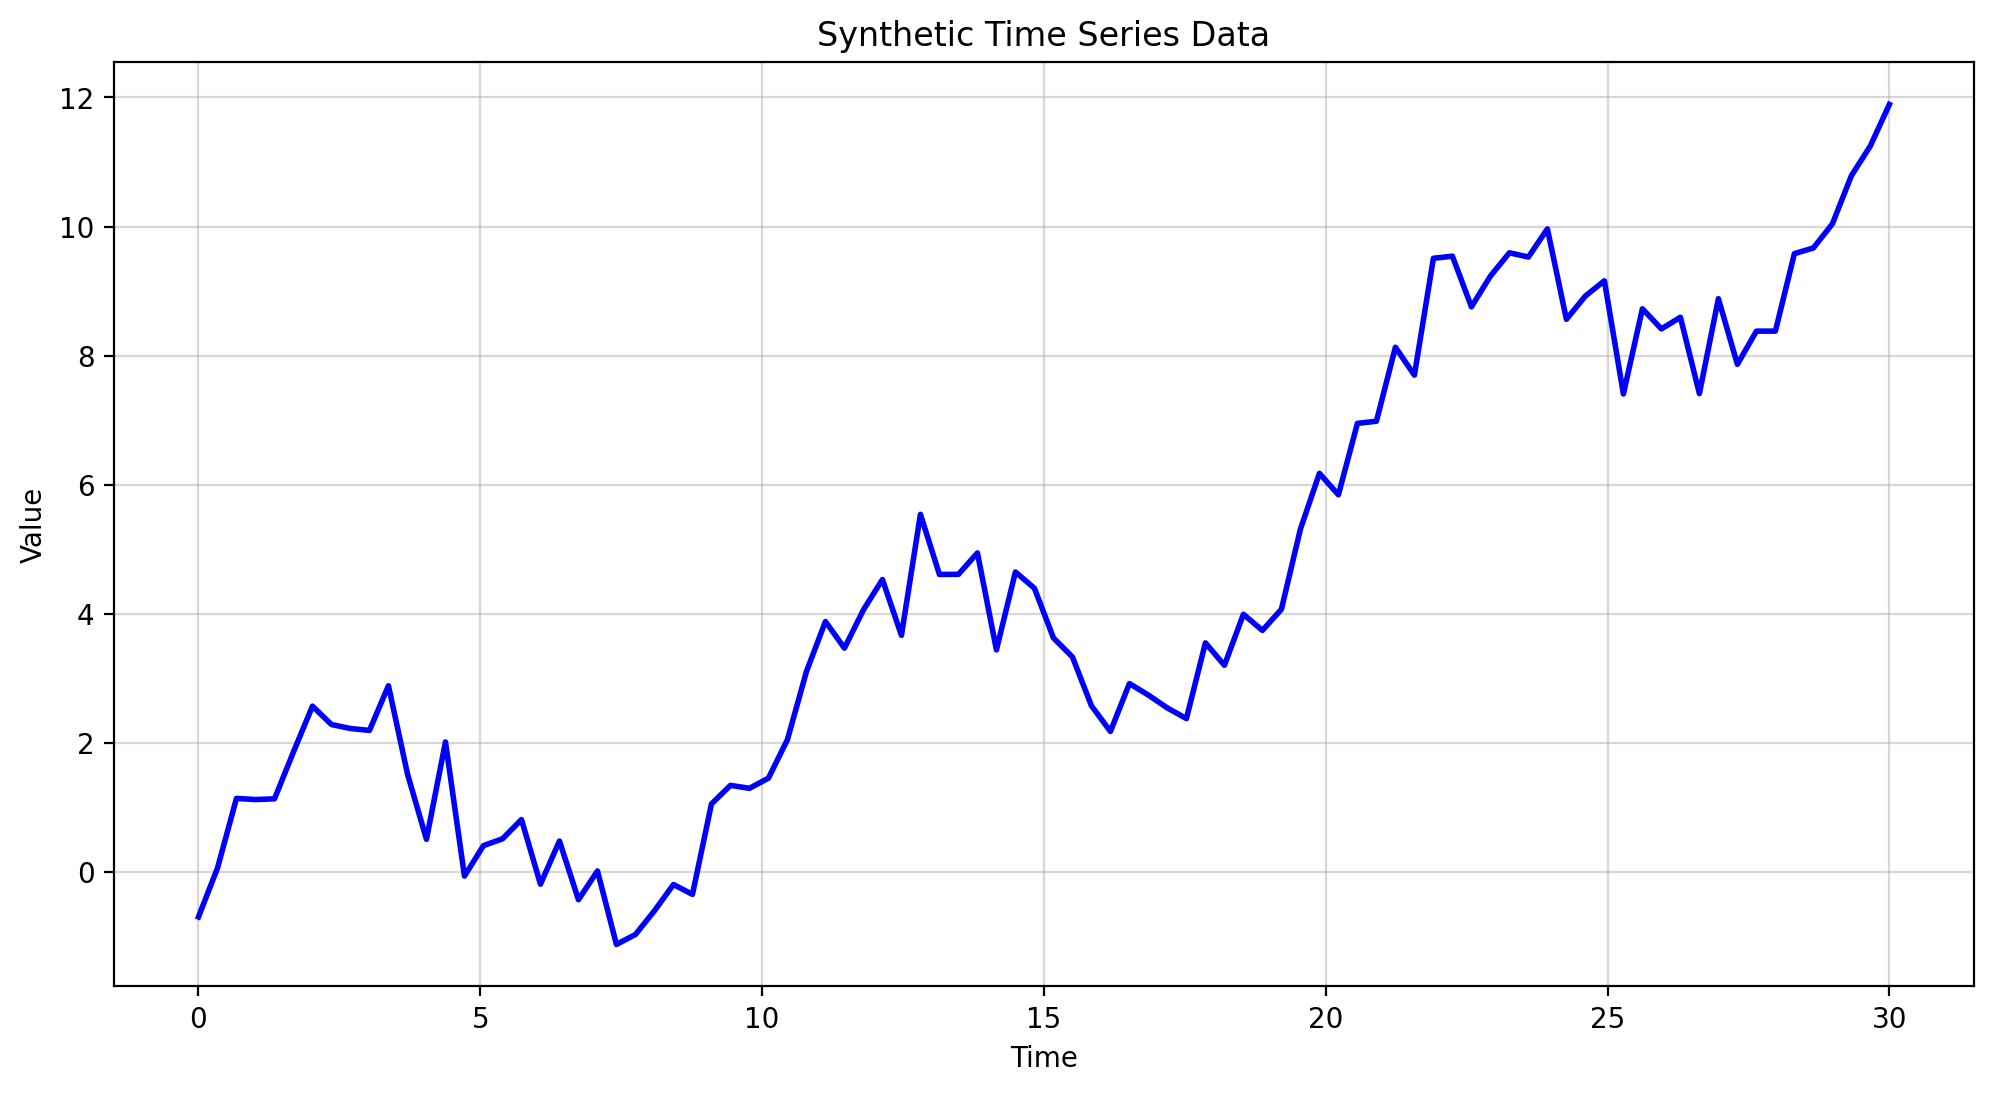

In [3]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Plot the synthetic time series data using Seaborn on Matplotlib axis
sns.lineplot(x=t, y=synthetic_data, color='b', linewidth=2, ax=ax)

# Customize Matplotlib axis
ax.set_title('Synthetic Time Series Data')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.grid(alpha=0.5)

In [4]:
'''SYNTHETIC DATA GENERATION 2 (additions are written with CAPS letters)
INCLUDING: {
seasonal_component: amplitude, frequency, SHIFT
trend_component: slope, quadratic_curvature, CUBIC_CURVATURE
noise: standard normal distributed with mean=0, sd=1
AUTOCORELLATION : 
}
'''

def generate_seasonal_component(t, amplitude, frequency, shift):
    return amplitude * np.sin(2 * np.pi * frequency * t + shift)

def generate_trend_component(t, slope, curvature_quadratic, curvature_cubic):
    return slope * t + curvature_quadratic * t**2 + curvature_cubic * t**3

def generate_autoregressive_component(t, ar_coefficients):
    ar_data = np.zeros_like(t)
    for i in range(len(ar_coefficients)):
        if i == 0:
            continue
        ar_data[i] = np.sum(ar_data[:i] * ar_coefficients[:i]) + np.random.randn()    
    return ar_data

def generate_synthetic_time_series(t, amplitude, frequency, slope, shift, curvature_quadratic, curvature_cubic,
                                    noise_level, ar_coefficients=None):
    seasonal_component = generate_seasonal_component(t, amplitude, frequency, shift)
    trend_component = generate_trend_component(t, slope, curvature_quadratic, curvature_cubic)
    noise = noise_level * np.random.randn(len(t))
    
    if ar_coefficients is not None:
        ar_data = generate_autoregressive_component(t, ar_coefficients)
    else:
        ar_data = np.zeros_like(t)

    synthetic_data_2 = seasonal_component + trend_component + noise + ar_data
    return synthetic_data_2


shift = -0.4* np.pi
curvature_quadratic = 0.01
curvature_cubic = 0
ar_coefficients = np.array([0.0, -0.0, 0.0])       


synthetic_data_2 = generate_synthetic_time_series(t, amplitude, frequency, slope, shift, curvature_quadratic, curvature_cubic,
                                    noise_level, ar_coefficients)

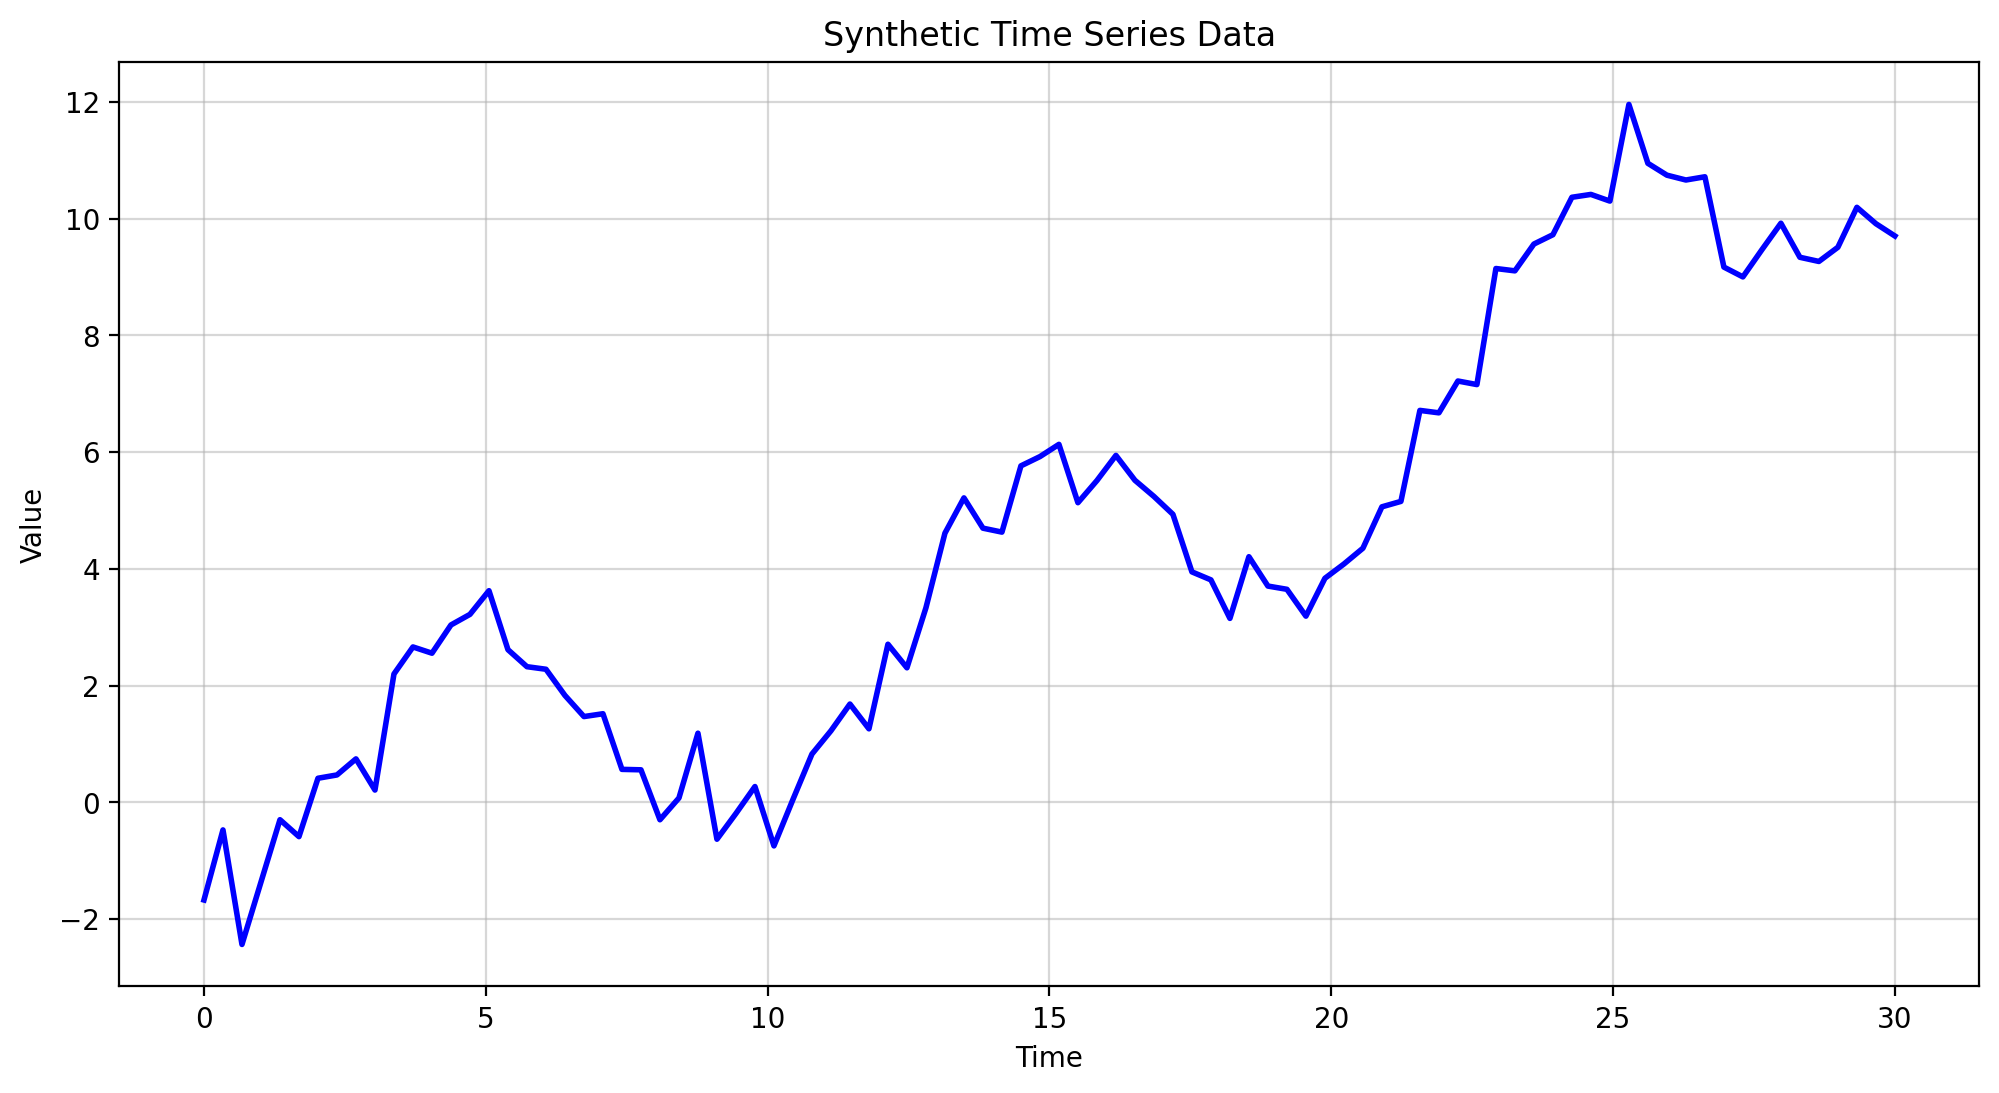

In [5]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Plot the synthetic time series data using Seaborn on Matplotlib axis
sns.lineplot(x=t, y=synthetic_data_2, color="b", linewidth=2, ax=ax)

# Customize Matplotlib axis
ax.set_title('Synthetic Time Series Data')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.grid(alpha=0.5)

plt.show()

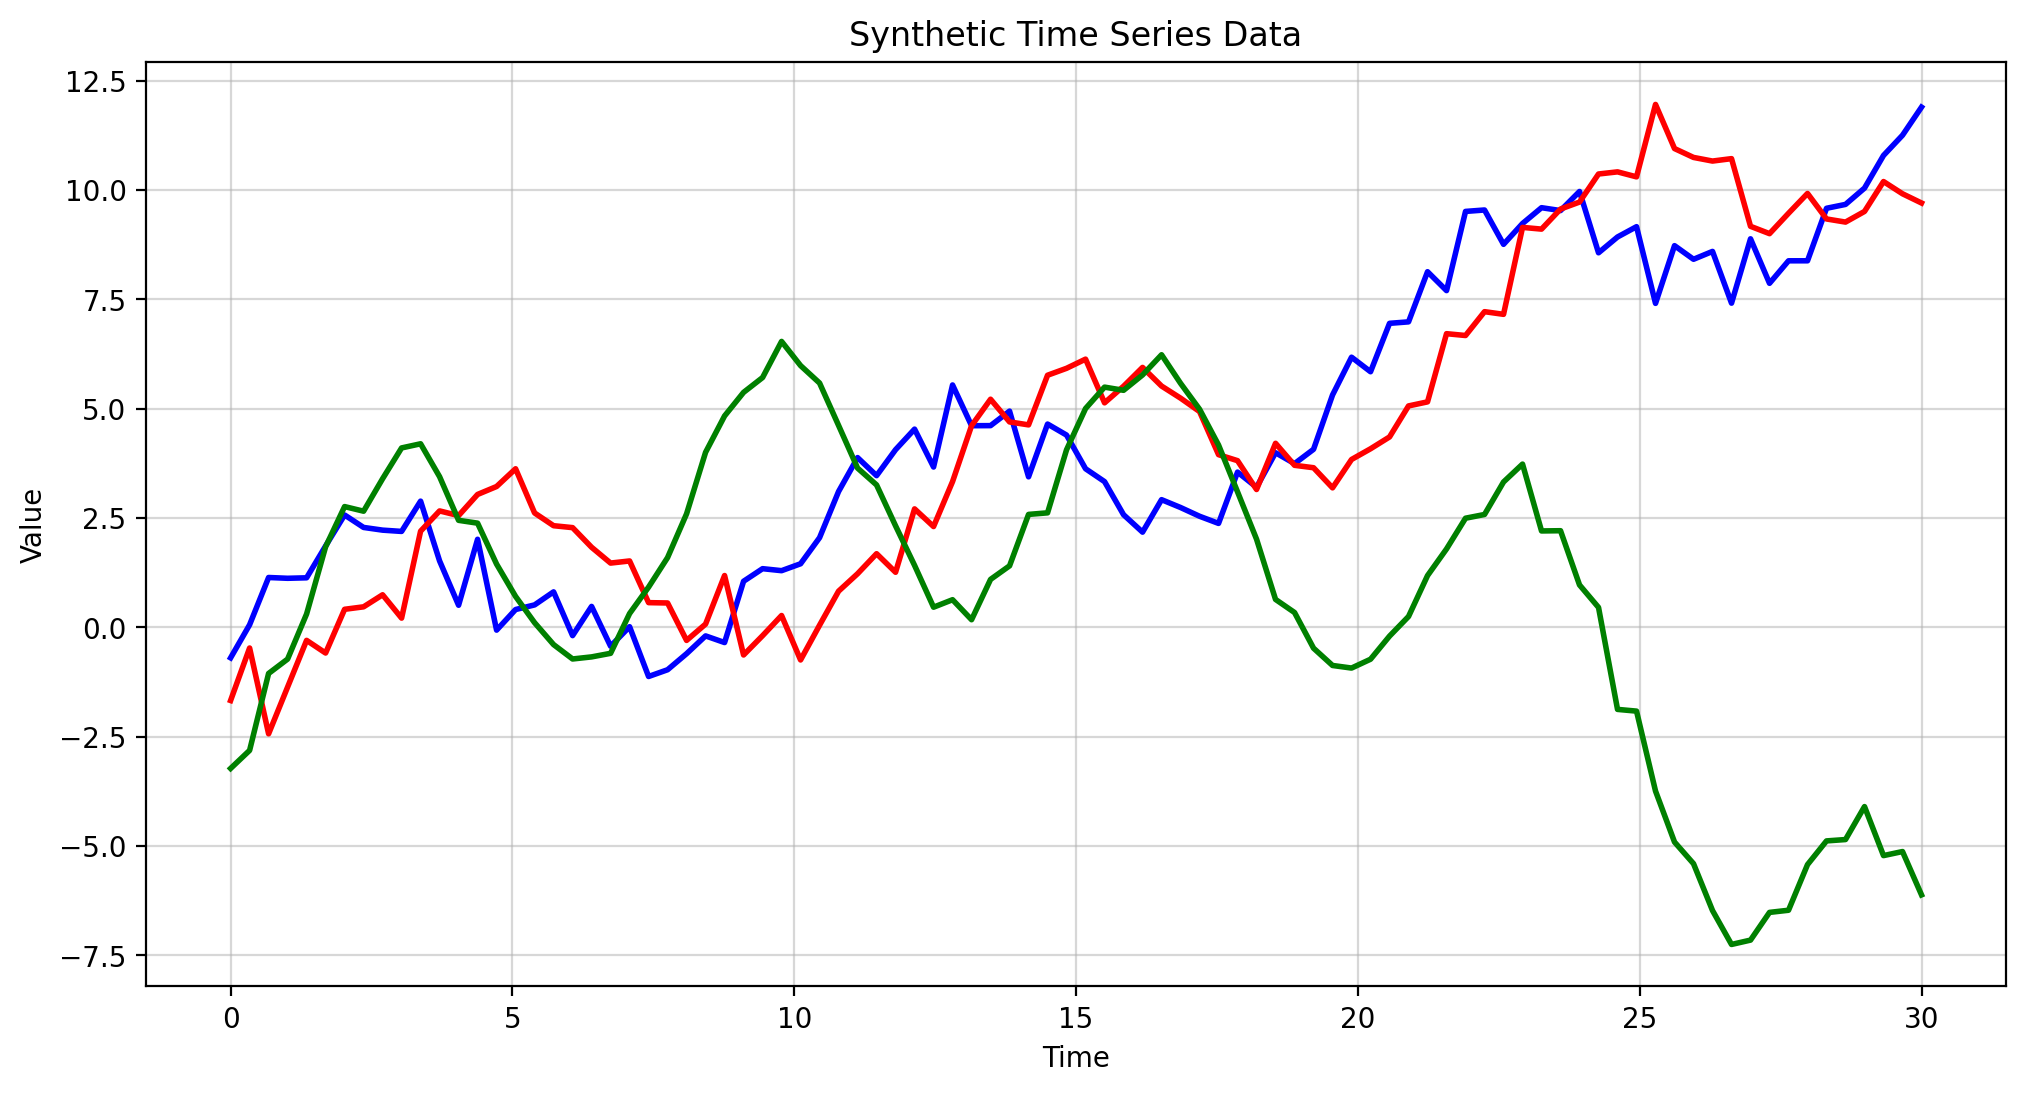

In [6]:
# Adding another synthetic time series with:
amplitude = 3.0               # amplitude increase 2 -> 3
frequency = 0.15             # frequency increase 0.1 -> 0.15
slope = 0.3                  # slope increase 0.1 -> 0.13
curvature_quadratic = 0.01       # quadratic curvature decrease 0.01 -> 0 
curvature_cubic = -0.001       # cubic curvature decrease 0 -> -0.02
noise_level = 0.3             

synthetic_data_3 = generate_synthetic_time_series(t, amplitude, frequency, slope, shift, curvature_quadratic, curvature_cubic,
                                    noise_level, ar_coefficients)


fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Plot the synthetic time series data using Seaborn on Matplotlib axis
sns.lineplot(x=t, y=synthetic_data, color="b", linewidth=2, ax=ax)
sns.lineplot(x=t, y=synthetic_data_2, color='r', linewidth=2, ax=ax)
sns.lineplot(x=t, y=synthetic_data_3, color="g", linewidth=2, ax=ax)

# Customize Matplotlib axis
ax.set_title('Synthetic Time Series Data')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.grid(alpha=0.5)



<Figure size 1200x600 with 0 Axes>

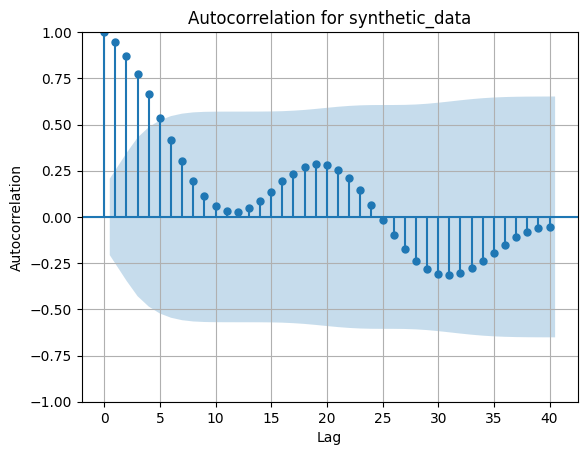

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

figure = plt.figure(figsize=(12, 6))
plot_acf(synthetic_data_3, lags=40, alpha=0.05)  # Adjust the number of lags
plt.title('Autocorrelation for synthetic_data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

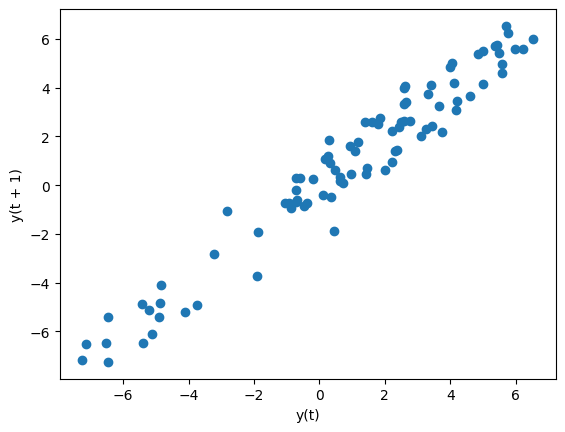

In [8]:
syn_data_3 = pd.DataFrame(synthetic_data_3)
pd.plotting.lag_plot(syn_data_3)

In [25]:
syn_data_3.columns=["y"]
syn_data_3.index.name = "x"
syn_data_3["y"]= syn_data_3["y"].round(3)

In [28]:
import bokeh
from bokeh.io import curdoc, show, output_notebook
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Slider, TextInput, TableColumn, DataTable, NumeralTickFormatter, NumberFormatter
from bokeh.plotting import figure


In [37]:
a = NumberFormatter(format="0.0000")
c= 3.2213323

In [27]:
plot = figure(height=400, width=400, title="Synthetic time series",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[0, 4*np.pi], y_range=[-7, 25])

source = ColumnDataSource(data=syn_data_3)
#source = ColumnDataSource(data=dict(x=syn_data_3.index, y=syn_data_3.values))
source.data


columns = [
        TableColumn(field="x", title="time"),
        TableColumn(field="y", title="value"),
    ]

data_table = DataTable(source=source, columns=columns, width=400, height=280, editable=True)

show(data_table)
output_notebook()

Loading BokehJS ...

In [38]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

from bokeh.io import curdoc
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Slider, TextInput, DateRangeSlider, HelpButton, Tooltip, DataTable, TableColumn
from bokeh.models import NumberFormatter
from bokeh.plotting import figure
from bokeh.models.dom import HTML


#CONSTANTS
MAX_WIDTH_SLIDERS=600
BACKGROUND_C= "#fefffa"



'''SYNTHETIC DATA GENERATION 2 (additions are written with CAPS letters)
INCLUDING: {
seasonal_component: amplitude, frequency, SHIFT
trend_component: slope, quadratic_curvature, CUBIC_CURVATURE
noise: standard normal distributed with mean=0, sd=1
AUTOCORELLATION : 
}
'''


def generate_seasonal_component(t, amplitude, frequency, shift):
    return amplitude * np.sin(2 * np.pi * frequency * t + shift* np.pi)

def generate_trend_component(t, slope, curvature_quadratic, curvature_cubic):
    return slope * t + curvature_quadratic * t**2 + curvature_cubic * t**3

def generate_autoregressive_component(t, ar_coefficients):
    ar_data = np.zeros_like(t)
    for i in range(len(ar_coefficients)):
        if i == 0:
            continue
        ar_data[i] = np.sum(ar_data[:i] * ar_coefficients[:i]) + np.random.randn()    
    return ar_data

def generate_noise(noise_level):
    return np.round(noise_level * np.random.randn(len(t)),4)

def generate_synthetic_time_series(t, amplitude, frequency, slope, shift, curvature_quadratic, curvature_cubic,
                                   ar_coefficients=None):
    seasonal_component = generate_seasonal_component(t, amplitude, frequency, shift)
    trend_component = generate_trend_component(t, slope, curvature_quadratic, curvature_cubic)
    
    if ar_coefficients is not None:
        ar_data = generate_autoregressive_component(t, ar_coefficients)
    else:
        ar_data = np.zeros_like(t)

    synthetic_data_ = seasonal_component + trend_component + ar_data
    return np.round(synthetic_data_, 4)

# Define parameters    
t = np.linspace(0, 30, 90)
amplitude = 2.0
shift = 0
frequency = 0.1
slope = 0.1
curvature_quadratic = 0.0
curvature_cubic = 0
noise_level = 0.5
ar_coefficients = np.array([0.0, -0.0, 0.0])

synthetic_data = generate_synthetic_time_series(t, amplitude, frequency, slope, shift, curvature_quadratic, curvature_cubic,
                                ar_coefficients=None)
default_noise = generate_noise(noise_level)

synthetic_data = pd.Series(synthetic_data + default_noise)
print(synthetic_data)
synthetic_data.round(decimals=4)


""" MAGIC BOKEH STUFF"""

plot = figure(min_width=400, max_width=1800, height=400, width_policy="max", title="Synthetic time series",
              tools="crosshair,pan,reset,save,wheel_zoom", margin=(0, 40, 10, 40), background_fill_color=BACKGROUND_C,
              min_border=60, x_range=[0, 90], y_range=[-7, 25], align="center")


source = ColumnDataSource(data=dict(x=synthetic_data.index, y=synthetic_data.values))
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
plot.legend.background_fill_alpha = 0.5
plot.xaxis.axis_label = "time"
plot.yaxis.axis_label = "value"


#text = TextInput(title="title", value='Synthetic Time Series')
offset = Slider(title="shift", value=0.0, start=-5.0, end=5.1, step=0.1, min_width=200, align="center",
                                max_width=MAX_WIDTH_SLIDERS, width_policy="max",sizing_mode="stretch_width")
slope = Slider(title="slope", value=0.2, start=-1.0, end=1.3, step=0.1, align="center")
amplitude = Slider(title="amplitude", value=2.0, start=-6.0, end=6.0, step=0.5, align="center")
phase = Slider(title="phase", value=0.0, start=0.0, end=2, step=0.5, align="center")
freq = Slider(title="frequency", value=0.1, start=0.02, end=0.3, step=0.02, align="center")
noise = Slider(title="noise", value=0.5, start=0.0, end=2, step=0.1, align="center")
date_range_slider = DateRangeSlider(value=(date(2018, 9, 15), date(2020, 9, 15)), step=10, start=date(2016, 9, 1),
                                    end=date(2022, 4, 15), margin=(0, 30, 0, 30), min_width=200,
                                    max_width=MAX_WIDTH_SLIDERS, width_policy="max",sizing_mode="stretch_width", align="center")


#Components such as row() and column() elements share their sizing mode with all of their children that do not have their own explicit sizing mode.


#def update_title(attrname, old, new):
 #   plot.title.text = text.value

#text.on_change('value', update_title)


def update_data(attrname, old, new):

    # Get the current slider values
    a = amplitude.value
    b = offset.value
    p = phase.value
    k = freq.value
    s = slope.value

    synthetic_data_temp = pd.Series(generate_synthetic_time_series(t, a, k, s, p, curvature_quadratic, curvature_cubic,
                                    ar_coefficients)+ default_noise)
    synthetic_data_temp.round(decimals=4)
    
    source.data = dict(x=synthetic_data_temp.index, y=synthetic_data_temp.values)

def update_noise(attrname, old, new):
    global default_noise

    n = noise.value
    updated_noise = generate_noise(n)
    default_noise=updated_noise
    
    a = amplitude.value
    b = offset.value
    p = phase.value
    k = freq.value
    s = slope.value

    synthetic_data_temp = pd.Series(generate_synthetic_time_series(t, a, k, s, p, curvature_quadratic, curvature_cubic,
                                    ar_coefficients)+ updated_noise)
    source.data = dict(x=synthetic_data_temp.index, y=synthetic_data_temp.values)
    


for w in [offset,slope, amplitude, phase, freq]:
    w.on_change('value', update_data)

noise.on_change("value", update_noise)

help_slope = HelpButton(tooltip=Tooltip(content=HTML("""
the slope represents the general trend of the time series.<br />
It determines the <b>average increase</b> in y over a period of time.<br/>
More information: <a href="https://en.wikipedia.org/wiki/Slope">slope</a>!
"""), position="right"), align="center")



columns = [
        TableColumn(field="x", title="time"),
        TableColumn(field="y", title="value", formatter=NumberFormatter(format="0.0000")),
    ]

data_table = DataTable(source=source, columns=columns, width=400, height=280, editable=True, align="center")




inputs = column(plot, row(slope, help_slope, align="center"), amplitude, phase, freq, noise)

# bokeh serve --show Synth_data_app.py
curdoc().title = "Synthetic data"
slider_menu_layout = column(row(slope, help_slope, align="center"), amplitude, phase, freq, noise, sizing_mode="stretch_width")
middle_row_layout = row(slider_menu_layout, data_table, align="center")
curdoc().add_root(column(plot, middle_row_layout, sizing_mode="stretch_width"))
#curdoc().add_root(inputs, sizing_mode="stretch_width")

##TODO
### ADD length of data ? (Current instances: 90)
### CHANGE to datetime objects ?
### 


0     0.3734
1     0.5992
2     0.6703
3     2.4025
4     1.5498
       ...  
85    0.6915
86    1.9788
87    1.5470
88    2.5393
89    1.7652
Length: 90, dtype: float64


/var/folders/bj/qcw9vb7x48j_hnyzlrj_pqtr0000gn/T/ipykernel_63171/2728571635.py:90: UserWarning: 
You are attempting to set `plot.legend.background_fill_alpha` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  plot.legend.background_fill_alpha = 0.5
